<a href="https://colab.research.google.com/github/Jaylen0401/scripts/blob/main/amylin_rest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amylin machine learning
#Author: Longsheng Xie

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/amylin_rest2/amylin_avg.csv")
type = {'high-affinity antagonist': 0,'low-affinity antagonist': 1, 'agonist': 2}
df.type = [type[item] for item in df.type]
df.describe()

,type,psi1,phi2,psi2,phi3,psi3,phi4,psi4,phi5,psi5,...,psi32,phi33,psi33,phi34,psi34,phi35,psi35,phi36,psi36,phi37
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,1.000000,104.819719,-77.731641,108.499641,-74.177602,99.135983,-94.247095,121.511179,-75.074924,96.275350,...,113.528888,-23.861362,6.761268,-81.707171,103.478991,-53.663356,69.060273,-88.467448,107.564564,-83.655339
std,0.866043,49.046041,37.057763,45.120715,36.832998,50.264185,28.968862,40.419054,31.237040,52.908250,...,50.747327,67.830813,117.673754,53.866269,59.995730,59.262591,84.328146,41.009967,57.354444,15.544478
min,0.000000,-179.932632,-179.143051,-179.921493,-179.964676,-179.891769,-179.908081,-179.985825,-179.042221,-179.706619,...,-179.998917,-179.593140,-179.994385,-179.979065,-179.947342,-179.535400,-179.980102,-179.898407,-179.955429,-167.296356
25%,0.000000,104.819719,-79.382195,108.499641,-77.348488,99.135983,-94.247095,121.511179,-75.074924,96.275350,...,113.528888,-71.823868,-56.067706,-109.841303,103.478991,-89.113735,20.723210,-107.828665,107.564564,-88.515892
50%,1.000000,104.819719,-77.731641,108.499641,-74.177602,99.135983,-94.247095,121.511179,-75.074924,96.275350,...,122.727226,-23.861362,6.761268,-81.707171,120.976673,-59.682941,69.060273,-88.467448,121.497620,-83.655339
75%,2.000000,135.980892,-77.731641,134.889538,-74.177602,132.635994,-84.197445,140.433914,-72.944004,136.775696,...,140.688446,46.827573,142.161026,-66.540737,144.105621,-53.663356,139.231136,-69.435898,142.870251,-74.803211
max,2.000000,179.885712,177.880142,179.929291,178.961868,179.964462,179.694992,179.961410,179.316528,179.802597,...,179.681732,179.778534,179.993942,179.995438,179.959000,179.309036,179.996277,179.996414,179.999908,-3.283271


In [ ]:
group = df.groupby(['group'])
amy  = group.mean()
amy

,type,psi1,phi2,psi2,phi3,psi3,phi4,psi4,phi5,psi5,...,psi32,phi33,psi33,phi34,psi34,phi35,psi35,phi36,psi36,phi37
group,,,,,,,,,,,,,,,,,,,,,
ac253,0.0,104.819719,-77.731641,108.499641,-74.177602,99.135983,-94.247095,121.511179,-75.074924,96.275350,...,115.416528,-35.194909,6.468648,-61.811622,116.740075,-73.039533,98.723287,-87.940346,106.087989,-85.347671
davalintide,1.0,123.024318,-71.876026,110.685356,-89.959585,85.127722,-79.414793,104.615808,-72.236223,56.738685,...,133.008459,-39.284473,-7.267395,-97.625215,128.345794,-30.138666,63.455105,-73.643829,97.610544,-84.710187
hamylin,2.0,109.296424,-79.347315,123.664106,-76.152772,120.333113,-93.648524,130.861366,-73.431773,95.787003,...,128.558808,-39.012397,38.450831,-54.526951,84.128150,-85.657761,75.452028,-94.718624,109.875990,-87.074923
pramlintide,2.0,107.366802,-81.210401,117.659123,-56.598763,103.478997,-101.684345,130.724426,-71.208428,122.017767,...,130.434921,-21.680631,17.478951,-86.423756,112.723636,-53.511035,99.226738,-93.601465,97.836007,-87.378786
r14,0.0,104.819719,-77.731641,108.499641,-74.177602,99.135983,-94.247095,121.511179,-75.074924,96.275350,...,113.528888,-23.861362,6.761268,-81.707171,103.478991,-53.663356,69.060273,-88.467448,107.564564,-83.655339
r5,0.0,104.819719,-77.731641,108.499641,-74.177602,99.135983,-94.247095,121.511179,-75.074924,96.275350,...,113.528888,-23.861362,6.761268,-81.707171,103.478991,-53.663356,69.060273,-88.467448,107.564564,-83.655339
ramylin,2.0,79.591333,-78.492821,81.989979,-73.999287,87.604100,-102.240718,119.843115,-83.423271,110.557943,...,69.724365,-3.216427,-0.976946,-87.107337,74.361876,-63.640576,58.554069,-95.245574,102.992958,-83.916850
sct832,1.0,104.819719,-77.731641,108.499641,-74.177602,99.135983,-94.247095,121.511179,-75.074924,96.275350,...,104.030249,-4.779332,-13.586484,-102.748145,104.574417,-15.992564,18.950409,-85.654853,130.983894,-73.503615


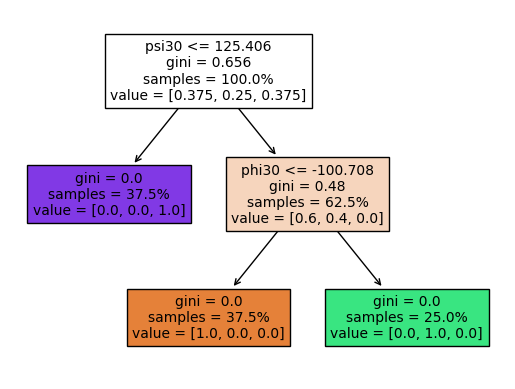

In [ ]:
tree = DecisionTreeClassifier(random_state=34)
tree.fit(amy.drop('type', axis=1), amy['type'])
plt.figure()
plot_tree(tree, filled=True, fontsize=10, feature_names=amy.columns.drop('type'), proportion = True)
plt.show()

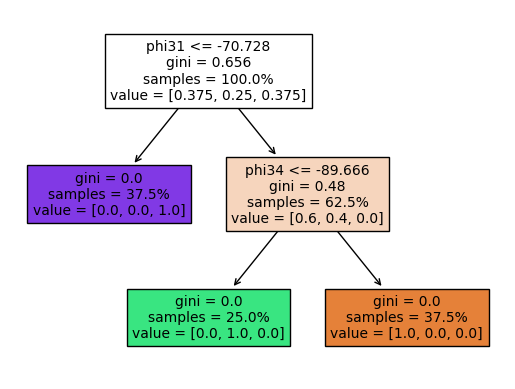

In [ ]:
amy_1 = amy.drop(['psi30', 'phi30'], axis=1)
tree = DecisionTreeClassifier(random_state=34)
tree.fit(amy_1.drop('type', axis=1), amy_1['type'])
plt.figure()
plot_tree(tree, filled=True, fontsize=10, feature_names=amy_1.columns.drop('type'), proportion = True)
plt.show()

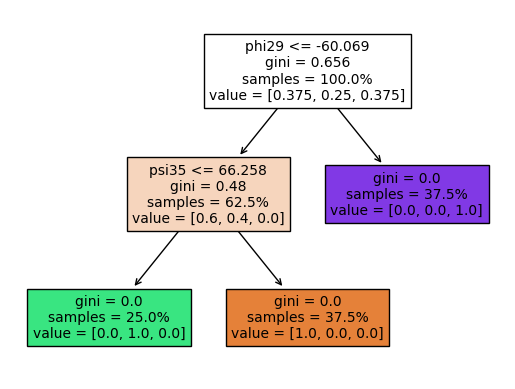

In [ ]:
amy_2 = amy_1.drop(['phi31', 'phi34'], axis=1)
tree = DecisionTreeClassifier(random_state=34)
tree.fit(amy_2.drop('type', axis=1), amy_2['type'])
plt.figure()
plot_tree(tree, filled=True, fontsize=10, feature_names=amy_2.columns.drop('type'), proportion = True)
plt.show()

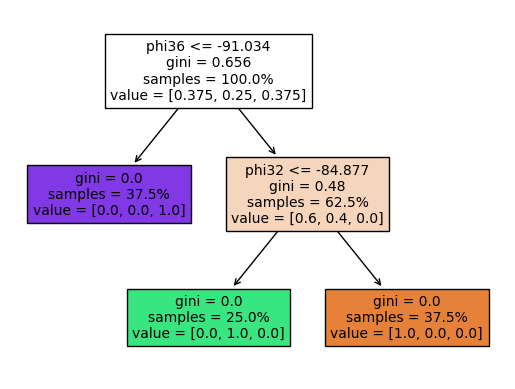

In [ ]:
amy_3 = amy_2.drop(['phi29', 'psi35'], axis=1)
tree = DecisionTreeClassifier(random_state=34)
tree.fit(amy_3.drop('type', axis=1), amy_3['type'])
plt.figure()
plot_tree(tree, filled=True, fontsize=10, feature_names=amy_3.columns.drop('type'), proportion = True)
plt.show()

In [ ]:
#dt 1 2 3 4
ml = pd.concat([amy['type'], amy['phi30'], amy['psi30'], amy['phi31'], amy['phi34'], amy['phi29'], amy['psi35'], amy['phi36'], amy['phi32']], axis=1)
acc=0
grouping = ['r5', 'r14', 'ac253', 'sct832', 'davalintide', 'pramlintide', 'ramylin', 'hamylin']
sc = StandardScaler()
for group in grouping:
  X_pre_train = ml.loc[ml.index != group]
  X_pre_test = ml.loc[ml.index == group]
  X_train =  sc.fit_transform(X_pre_train.iloc[:, 1:])
  X_test = sc.transform(X_pre_test.iloc[:,1:])
  y_train = X_pre_train['type']
  y_test = X_pre_test['type']

  clf=RandomForestClassifier(n_estimators=5000)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)

  print(group, clf.score(X_train, y_train), clf.score(X_test, y_test))

  acc += clf.score(X_test, y_test)

 # print(confusion_matrix(y_test, y_preds,  labels = [0, 1, 2]))
  print('-----------------------------------')

print('Accuracy is:', acc/8)

r5 1.0 1.0
-----------------------------------
r14 1.0 1.0
-----------------------------------
ac253 1.0 1.0
-----------------------------------
sct832 1.0 0.0
-----------------------------------
davalintide 1.0 0.0
-----------------------------------
pramlintide 1.0 1.0
-----------------------------------
ramylin 1.0 1.0
-----------------------------------
hamylin 1.0 0.0
-----------------------------------
Accuracy is: 0.625


In [ ]:
#dt 1 2 3
ml = pd.concat([amy['type'], amy['phi30'], amy['psi30'], amy['phi31'], amy['phi34'], amy['phi29'], amy['psi35']], axis=1)
acc=0
grouping = ['r5', 'r14', 'ac253', 'sct832', 'davalintide', 'pramlintide', 'ramylin', 'hamylin']
sc = StandardScaler()
for group in grouping:
  X_pre_train = ml.loc[ml.index != group]
  X_pre_test = ml.loc[ml.index == group]
  X_train =  sc.fit_transform(X_pre_train.iloc[:, 1:])
  X_test = sc.transform(X_pre_test.iloc[:,1:])
  y_train = X_pre_train['type']
  y_test = X_pre_test['type']

  clf=RandomForestClassifier(n_estimators=5000)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)

  print(group, clf.score(X_train, y_train), clf.score(X_test, y_test))

  acc += clf.score(X_test, y_test)

 # print(confusion_matrix(y_test, y_preds,  labels = [0, 1, 2]))
  print('-----------------------------------')

print('Accuracy is:', acc/8)

r5 1.0 1.0
-----------------------------------
r14 1.0 1.0
-----------------------------------
ac253 1.0 1.0
-----------------------------------
sct832 1.0 0.0
-----------------------------------
davalintide 1.0 0.0
-----------------------------------
pramlintide 1.0 1.0
-----------------------------------
ramylin 1.0 1.0
-----------------------------------
hamylin 1.0 0.0
-----------------------------------
Accuracy is: 0.625


In [ ]:
#dt 1 2 4
ml = pd.concat([amy['type'], amy['phi30'], amy['psi30'], amy['phi31'], amy['phi34'], amy['phi36'], amy['phi32']], axis=1)
acc=0
grouping = ['r5', 'r14', 'ac253', 'sct832', 'davalintide', 'pramlintide', 'ramylin', 'hamylin']
sc = StandardScaler()
for group in grouping:
  X_pre_train = ml.loc[ml.index != group]
  X_pre_test = ml.loc[ml.index == group]
  X_train =  sc.fit_transform(X_pre_train.iloc[:, 1:])
  X_test = sc.transform(X_pre_test.iloc[:,1:])
  y_train = X_pre_train['type']
  y_test = X_pre_test['type']

  clf=RandomForestClassifier(n_estimators=5000)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)

  print(group, clf.score(X_train, y_train), clf.score(X_test, y_test))

  acc += clf.score(X_test, y_test)

 # print(confusion_matrix(y_test, y_preds,  labels = [0, 1, 2]))
  print('-----------------------------------')

print('Accuracy is:', acc/8)

r5 1.0 1.0
-----------------------------------
r14 1.0 1.0
-----------------------------------
ac253 1.0 1.0
-----------------------------------
sct832 1.0 0.0
-----------------------------------
davalintide 1.0 1.0
-----------------------------------
pramlintide 1.0 1.0
-----------------------------------
ramylin 1.0 1.0
-----------------------------------
hamylin 1.0 0.0
-----------------------------------
Accuracy is: 0.75


In [ ]:
#dt 2 3 4
ml = pd.concat([amy['type'], amy['phi31'], amy['phi34'], amy['phi29'], amy['psi35'], amy['phi36'], amy['phi32']], axis=1)
acc=0
grouping = ['r5', 'r14', 'ac253', 'sct832', 'davalintide', 'pramlintide', 'ramylin', 'hamylin']
sc = StandardScaler()
for group in grouping:
  X_pre_train = ml.loc[ml.index != group]
  X_pre_test = ml.loc[ml.index == group]
  X_train =  sc.fit_transform(X_pre_train.iloc[:, 1:])
  X_test = sc.transform(X_pre_test.iloc[:,1:])
  y_train = X_pre_train['type']
  y_test = X_pre_test['type']

  clf=RandomForestClassifier(n_estimators=5000)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)

  print(group, clf.score(X_train, y_train), clf.score(X_test, y_test))

  acc += clf.score(X_test, y_test)

 # print(confusion_matrix(y_test, y_preds,  labels = [0, 1, 2]))
  print('-----------------------------------')

print('Accuracy is:', acc/8)

r5 1.0 1.0
-----------------------------------
r14 1.0 1.0
-----------------------------------
ac253 1.0 1.0
-----------------------------------
sct832 1.0 0.0
-----------------------------------
davalintide 1.0 1.0
-----------------------------------
pramlintide 1.0 1.0
-----------------------------------
ramylin 1.0 1.0
-----------------------------------
hamylin 1.0 1.0
-----------------------------------
Accuracy is: 0.875


all data

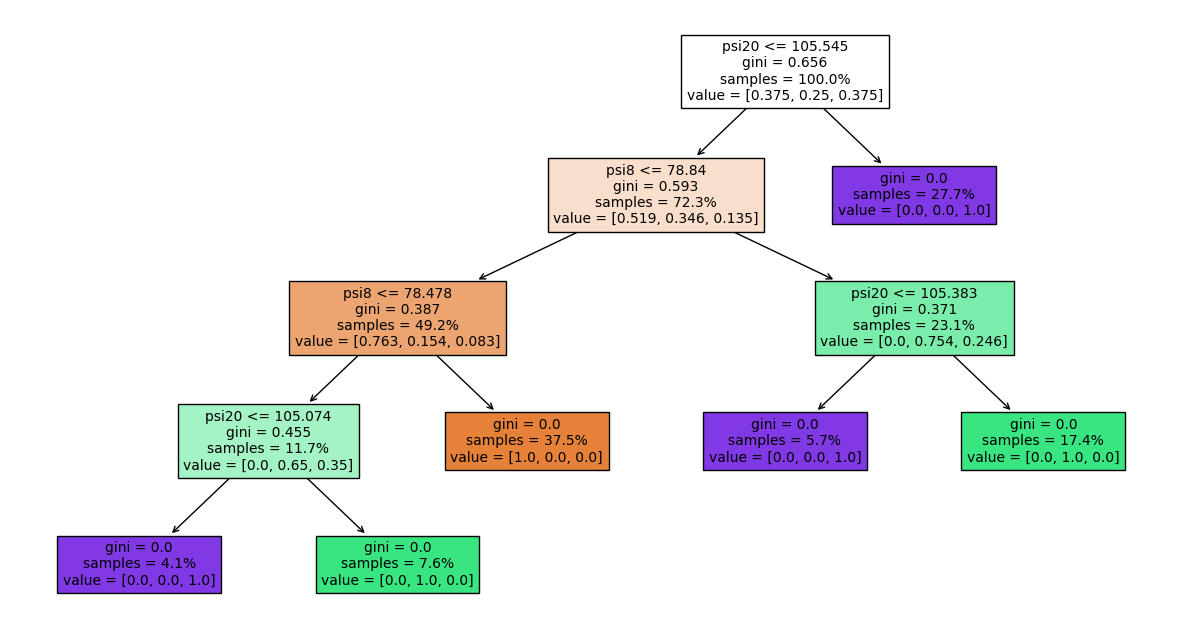

In [ ]:
df_t = df.drop('group', axis = 1)
tree = DecisionTreeClassifier(random_state=34)
tree.fit(df_t.drop('type', axis=1), df_t['type'])
plt.figure(figsize=(15,8))
plot_tree(tree, filled=True, fontsize=10, feature_names=df_t.columns.drop('type'), proportion = True)
plt.show()

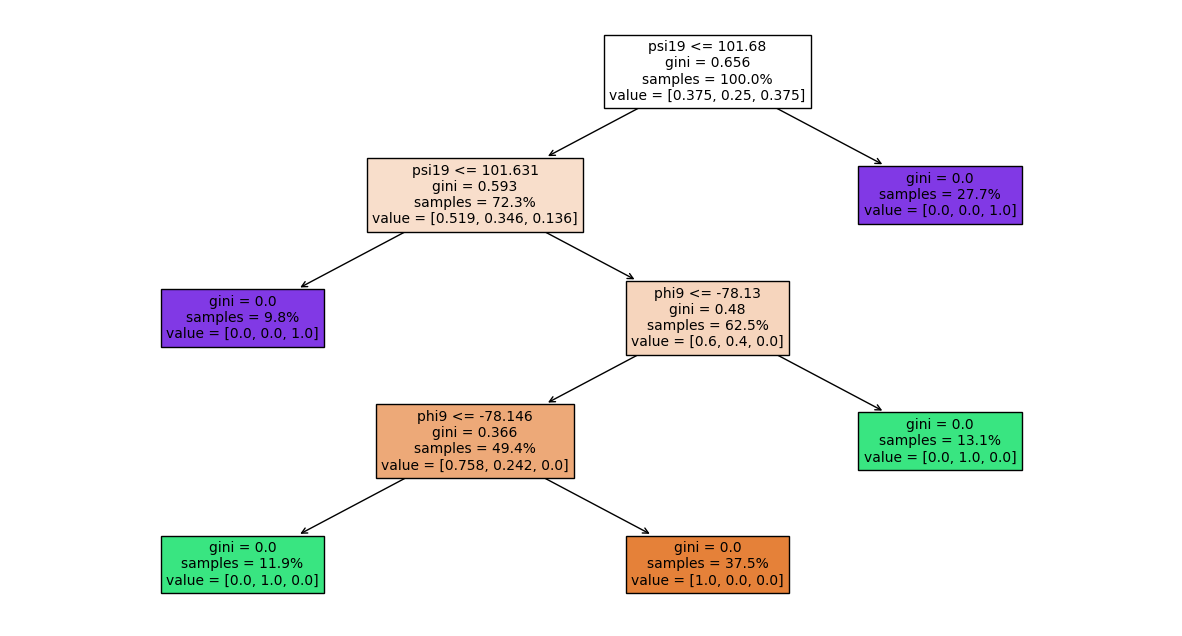

In [ ]:
df_t_1 = df_t.drop(['psi20','psi8'], axis=1)
tree = DecisionTreeClassifier(random_state=34)
tree.fit(df_t_1.drop('type', axis=1), df_t_1['type'])
plt.figure(figsize=(15,8))
plot_tree(tree, filled=True, fontsize=10, feature_names=df_t_1.columns.drop('type'), proportion = True)
plt.show()

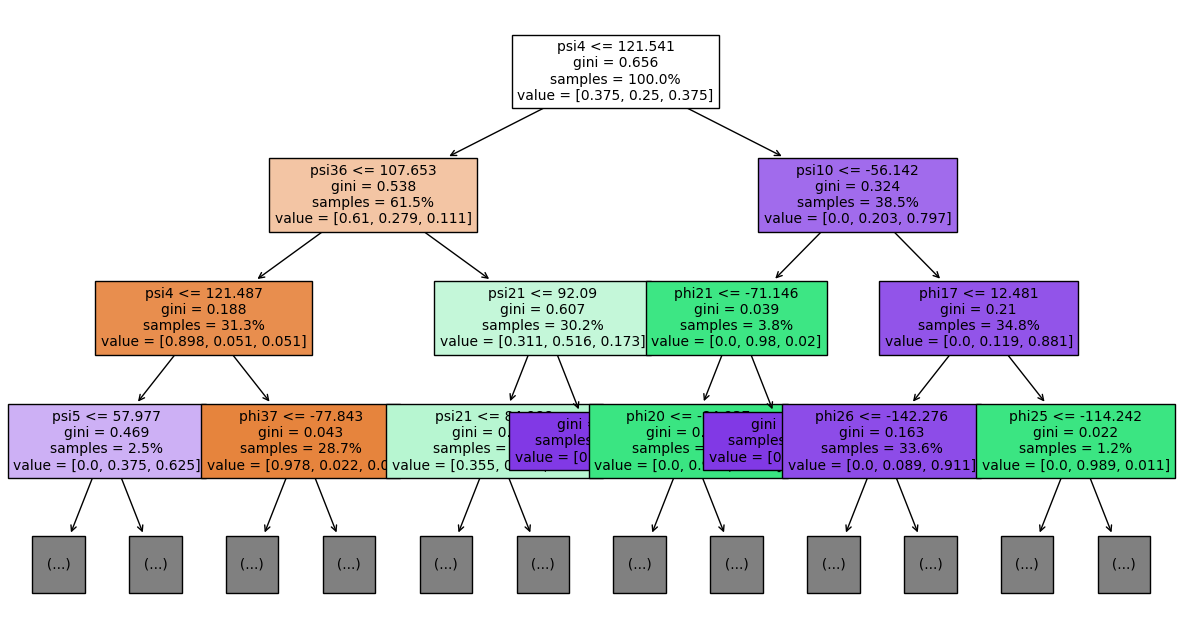

In [ ]:
df_t_2 = df_t_1.drop(['psi19','phi9'], axis=1)
tree = DecisionTreeClassifier(random_state=34)
tree.fit(df_t_2.drop('type', axis=1), df_t_2['type'])
plt.figure(figsize=(15,8))
plot_tree(tree, filled=True, fontsize=10, feature_names=df_t_2.columns.drop('type'), max_depth = 3, proportion = True)
plt.show()

psi4 psi36 psi10 psi21 phi21 phi17             psi5 phi37 phi20 phi26 phi25

In [ ]:
tree_data = pd.concat([df['group'], df['type'], df['psi20'], df['psi8'],df['psi19'], df['phi9']], axis=1)

grouping = ['r5', 'r14', 'ac253', 'sct832', 'davalintide', 'pramlintide', 'ramylin', 'hamylin']
sc = StandardScaler()
acc = 0
for group in grouping:
  X_pre_train = tree_data.loc[tree_data['group'] != group]
  X_pre_test = tree_data.loc[tree_data['group'] == group]
  X_train =  sc.fit_transform(X_pre_train.iloc[:, 2:])
  X_test = sc.transform(X_pre_test.iloc[:,2:])
  y_train = X_pre_train['type']
  y_test = X_pre_test['type']

  clf=RandomForestClassifier(n_estimators=5000)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)

  print(group, clf.score(X_train, y_train), clf.score(X_test, y_test))

  acc += clf.score(X_test, y_test)

  print(confusion_matrix(y_test, y_preds,  labels = [0, 1, 2]))
  print('-----------------------------------')

print('Accuracy is:', acc/8)

r5 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
r14 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
ac253 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
sct832 1.0 1.0
[[   0    0    0]
 [   0 3000    0]
 [   0    0    0]]
-----------------------------------
davalintide 1.0 0.9996666666666667
[[   0    0    0]
 [   1 2999    0]
 [   0    0    0]]
-----------------------------------
pramlintide 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
ramylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
hamylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
Accuracy is: 0.9999583333333333


In [ ]:
tree_data = pd.concat([df['group'], df['type'], df['psi20'], df['psi8'],df['psi19'], df['phi9'], df['psi4'], df['psi36'], df['psi10'], df['psi21'], df['phi21'], df['phi17']], axis=1)

grouping = ['r5', 'r14', 'ac253', 'sct832', 'davalintide', 'pramlintide', 'ramylin', 'hamylin']
sc = StandardScaler()
acc = 0
for group in grouping:
  X_pre_train = tree_data.loc[tree_data['group'] != group]
  X_pre_test = tree_data.loc[tree_data['group'] == group]
  X_train =  sc.fit_transform(X_pre_train.iloc[:, 2:])
  X_test = sc.transform(X_pre_test.iloc[:,2:])
  y_train = X_pre_train['type']
  y_test = X_pre_test['type']

  clf=RandomForestClassifier(n_estimators=5000)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)

  print(group, clf.score(X_train, y_train), clf.score(X_test, y_test))

  acc += clf.score(X_test, y_test)

  print(confusion_matrix(y_test, y_preds,  labels = [0, 1, 2]))
  print('-----------------------------------')

print('Accuracy is:', acc/8)

r5 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
r14 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
ac253 1.0 0.248
[[ 744 2256    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
sct832 1.0 0.9983333333333333
[[   0    0    0]
 [   5 2995    0]
 [   0    0    0]]
-----------------------------------
davalintide 1.0 0.41433333333333333
[[   0    0    0]
 [   1 1243 1756]
 [   0    0    0]]
-----------------------------------
pramlintide 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
ramylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
hamylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
Accuracy is: 0.8325833333333333


In [ ]:
tree_data = pd.concat([df['group'], df['type'], df['psi20'], df['psi8'], df['psi4'], df['psi36'], df['psi10'], df['psi21'], df['phi21'], df['phi17']], axis=1)

grouping = ['r5', 'r14', 'ac253', 'sct832', 'davalintide', 'pramlintide', 'ramylin', 'hamylin']
sc = StandardScaler()
acc = 0
for group in grouping:
  X_pre_train = tree_data.loc[tree_data['group'] != group]
  X_pre_test = tree_data.loc[tree_data['group'] == group]
  X_train =  sc.fit_transform(X_pre_train.iloc[:, 2:])
  X_test = sc.transform(X_pre_test.iloc[:,2:])
  y_train = X_pre_train['type']
  y_test = X_pre_test['type']

  clf=RandomForestClassifier(n_estimators=5000)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)

  print(group, clf.score(X_train, y_train), clf.score(X_test, y_test))

  acc += clf.score(X_test, y_test)

  print(confusion_matrix(y_test, y_preds,  labels = [0, 1, 2]))
  print('-----------------------------------')

print('Accuracy is:', acc/8)

r5 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
r14 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
ac253 1.0 0.006
[[  18 2982    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
sct832 1.0 0.7263333333333334
[[   0    0    0]
 [ 821 2179    0]
 [   0    0    0]]
-----------------------------------
davalintide 1.0 0.375
[[   0    0    0]
 [   1 1125 1874]
 [   0    0    0]]
-----------------------------------
pramlintide 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
ramylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
hamylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
Accuracy is: 0.7634166666666666


In [ ]:
tree_data = pd.concat([df['group'], df['type'],df['psi19'], df['phi9'], df['psi4'], df['psi36'], df['psi10'], df['psi21'], df['phi21'], df['phi17']], axis=1)

grouping = ['r5', 'r14', 'ac253', 'sct832', 'davalintide', 'pramlintide', 'ramylin', 'hamylin']
sc = StandardScaler()
acc = 0
for group in grouping:
  X_pre_train = tree_data.loc[tree_data['group'] != group]
  X_pre_test = tree_data.loc[tree_data['group'] == group]
  X_train =  sc.fit_transform(X_pre_train.iloc[:, 2:])
  X_test = sc.transform(X_pre_test.iloc[:,2:])
  y_train = X_pre_train['type']
  y_test = X_pre_test['type']

  clf=RandomForestClassifier(n_estimators=5000)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)

  print(group, clf.score(X_train, y_train), clf.score(X_test, y_test))

  acc += clf.score(X_test, y_test)

  print(confusion_matrix(y_test, y_preds,  labels = [0, 1, 2]))
  print('-----------------------------------')

print('Accuracy is:', acc/8)

r5 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
r14 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
ac253 1.0 0.0013333333333333333
[[   4 2996    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
sct832 1.0 0.454
[[   0    0    0]
 [1638 1362    0]
 [   0    0    0]]
-----------------------------------
davalintide 1.0 0.374
[[   0    0    0]
 [   4 1122 1874]
 [   0    0    0]]
-----------------------------------
pramlintide 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
ramylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
hamylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
Accuracy is: 0.7286666666666667


In [ ]:
tree_data = pd.concat([df['group'], df['type'], df['psi5'], df['phi37'],df['phi20'], df['phi26'], df['phi25'], df['psi4'], df['psi36'], df['psi10'], df['psi21'], df['phi21'], df['phi17']], axis=1)

grouping = ['r5', 'r14', 'ac253', 'sct832', 'davalintide', 'pramlintide', 'ramylin', 'hamylin']
sc = StandardScaler()
acc = 0
for group in grouping:
  X_pre_train = tree_data.loc[tree_data['group'] != group]
  X_pre_test = tree_data.loc[tree_data['group'] == group]
  X_train =  sc.fit_transform(X_pre_train.iloc[:, 2:])
  X_test = sc.transform(X_pre_test.iloc[:,2:])
  y_train = X_pre_train['type']
  y_test = X_pre_test['type']

  clf=RandomForestClassifier(n_estimators=5000)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)

  print(group, clf.score(X_train, y_train), clf.score(X_test, y_test))

  acc += clf.score(X_test, y_test)

  print(confusion_matrix(y_test, y_preds,  labels = [0, 1, 2]))
  print('-----------------------------------')

print('Accuracy is:', acc/8)

r5 1.0 1.0
[[3000    0    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
r14 1.0 0.9986666666666667
[[2996    4    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
ac253 1.0 0.0
[[   0 3000    0]
 [   0    0    0]
 [   0    0    0]]
-----------------------------------
sct832 1.0 0.0
[[   0    0    0]
 [3000    0    0]
 [   0    0    0]]
-----------------------------------
davalintide 1.0 0.0
[[   0    0    0]
 [  20    0 2980]
 [   0    0    0]]
-----------------------------------
pramlintide 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
ramylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
hamylin 1.0 1.0
[[   0    0    0]
 [   0    0    0]
 [   0    0 3000]]
-----------------------------------
Accuracy is: 0.6248333333333334
